In [1]:
import regionmask
regionmask.__version__

'0.7.0'

In [2]:
import xarray as xr
xr.set_options(display_style="text")
xr.__version__

'0.19.0'

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(edgeitems=2)

In [4]:
regionmask.defined_regions.ar6


AR6 reference regions - Iturbide et al., 2020

Attributes
----------
all : Regions
    All regions (land + ocean).
land : Regions
    Land regions only
ocean : Regions
    Ocean regions only


In [5]:
ar6_all = regionmask.defined_regions.ar6.all
ar6_all

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


<regionmask.Regions>
Name:     AR6 reference regions
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/utils.py:15: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polys += list(p)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/utils.py:15: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  polys += list(p)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/plot.py:28: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  coords = _polygons_coords(polygons)


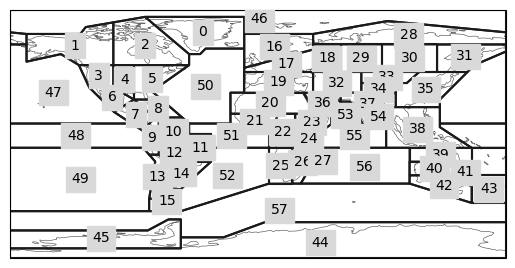

In [6]:
ax = ar6_all.plot()

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


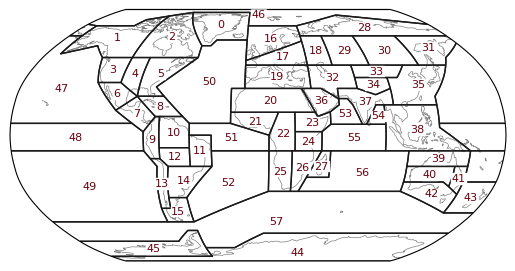

In [7]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

text_kws = dict(color="#67000d", fontsize=8, bbox=dict(pad=0.2, color="w"))

ax = ar6_all.plot(
    ax=ax,
    add_ocean=False,
    line_kws=dict(linewidth=1),
    coastlines=False,
    text_kws=text_kws,
)

ax.coastlines(color="0.5", lw=0.5);

In [8]:
new_zealand = ar6_all[[43]]
new_zealand

<regionmask.Regions>
Name:     AR6 reference regions
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)

Regions:
43 NZ New-Zealand

[1 regions]

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/plot.py:28: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  coords = _polygons_coords(polygons)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.

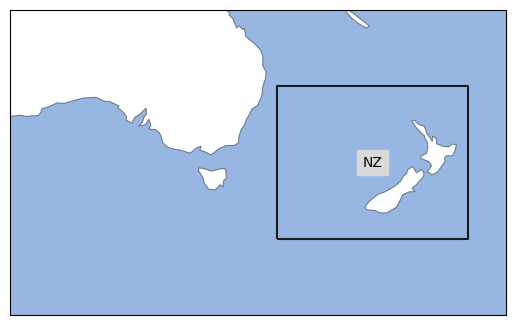

In [9]:
projection = ccrs.PlateCarree(central_longitude=180)

ax = new_zealand.plot(proj=projection, label="abbrev", add_ocean=True)

ax.set_extent([120, 185, -20, -60], ccrs.PlateCarree())

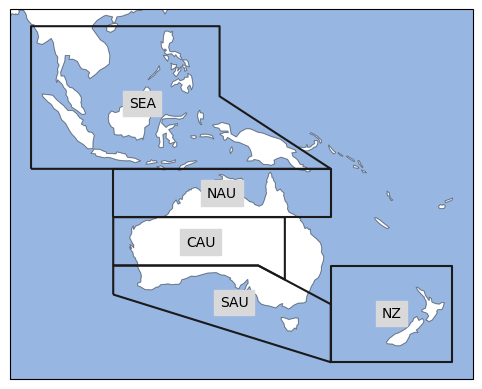

In [10]:
australasia = ar6_all[["NZ", "SEA", "NAU", "C.Australia", "SAU"]]

ax = australasia.plot(proj=projection, label="abbrev", add_ocean=True)

In [11]:
fN = ("auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc") 

ds = xr.open_dataset(fN)

tas = ds.tas

# calculate annual mean
tas = tas.groupby("time.year").mean("time")
tas = tas.rename(year="time")

In [12]:
# convert to celsius
tas = tas - 273.15

tas

<xarray.DataArray 'tas' (time: 165, lat: 64, lon: 128)>
array([[[-45.430008, -45.761246, ..., -44.75174 , -45.091705],
        [-45.896744, -46.590225, ..., -44.218903, -45.101715],
        ...,
        [-17.36702 , -17.171188, ..., -17.895187, -17.624313],
        [-18.64714 , -18.557785, ..., -18.7753  , -18.694626]],

       [[-44.4169  , -44.72325 , ..., -43.792145, -44.099274],
        [-44.805893, -45.43962 , ..., -43.2538  , -44.080124],
        ...,
        [-16.245056, -16.032959, ..., -16.703278, -16.45105 ],
        [-17.691727, -17.641739, ..., -17.772202, -17.741959]],

       ...,

       [[-42.882904, -43.175674, ..., -42.251236, -42.573135],
        [-43.605988, -44.256134, ..., -41.999786, -42.84581 ],
        ...,
        [-14.617554, -14.334442, ..., -15.218384, -14.910461],
        [-15.229614, -15.190063, ..., -15.348999, -15.286438]],

       [[-42.611115, -42.900314, ..., -42.01175 , -42.32065 ],
        [-42.784317, -43.42357 , ..., -41.23117 , -42.06967 ],
        ...,
        [-13.792969, -13.55722 , ..., -14.30069 , -14.045441],
        [-14.829285, -14.778809, ..., -14.893127, -14.84668 ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 ...
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/

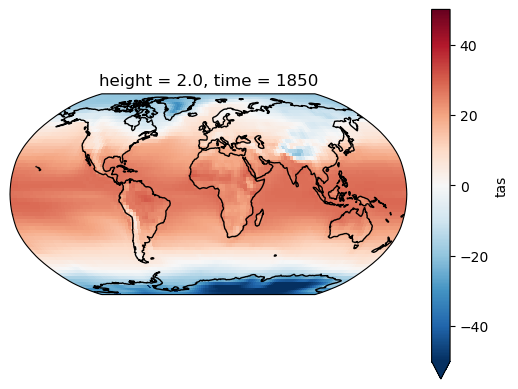

In [13]:
proj = ccrs.Robinson()

f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = tas.isel(time=0).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), robust=True, center=0
)

ax.coastlines();

In [14]:
ar6_land = regionmask.defined_regions.ar6.land

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


In [15]:
mask_2D = ar6_land.mask(tas)

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/

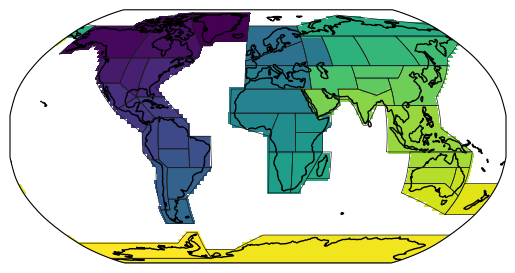

In [16]:
proj = ccrs.Robinson()
f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = mask_2D.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

ax.coastlines()

ar6_land.plot_regions(line_kws=dict(lw=0.5), add_label=False);

In [17]:
mask_3D = ar6_land.mask_3D(tas)
mask_3D

<xarray.DataArray 'region' (region: 46, lat: 64, lon: 128)>
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 'GIC' 'NWN' 'NEN' 'WNA' ... 'SAU' 'NZ' 'EAN' 'WAN'
    names    (region) <U22 'Greenland/Iceland' ... 'W.Antarctica'

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/

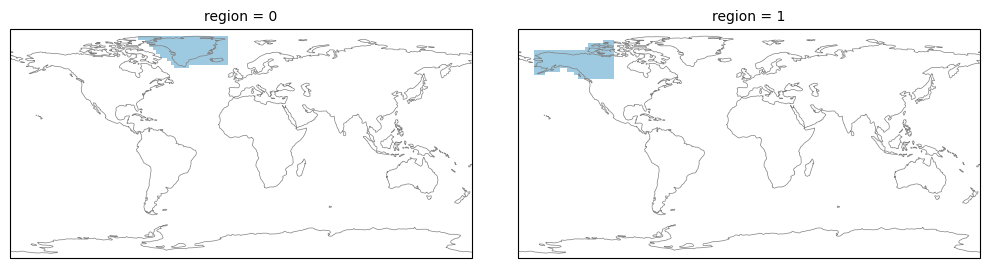

In [18]:
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask_3D.isel(region=slice(2)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines(lw=0.5, color="0.5")

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

In [19]:
# 1) by the index of the region:
r1 = mask_3D.sel(region=2)

# 2) with the abbreviation
r2 = mask_3D.isel(region=(mask_3D.abbrevs == "CNA"))

# 3) with the long name:
r3 = mask_3D.isel(region=(mask_3D.names == "C.North-America"))

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


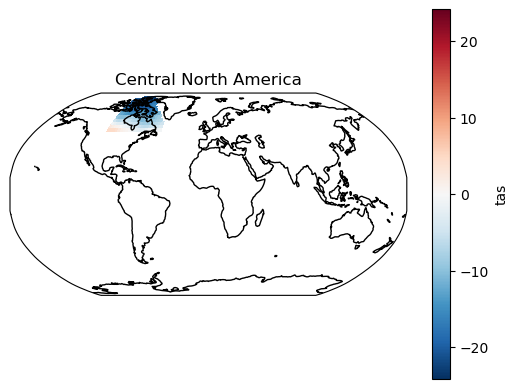

In [20]:
tas_CNA = tas.where(r1)

proj = ccrs.Robinson()

ax = plt.subplot(111, projection=proj)

tas_CNA.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.set_title("Central North America")

ax.coastlines();

In [21]:
weights = np.cos(np.deg2rad(tas.lat))

tas_regional = tas.weighted(mask_3D * weights).mean(dim=("lat", "lon"))

In [22]:
tas_regional

<xarray.DataArray 'tas' (time: 165, region: 46)>
array([[-14.34435989,  -4.57573997, ..., -32.31694793, -20.89343577],
       [-14.05052335,  -5.25600597, ..., -31.61877546, -21.7574261 ],
       ...,
       [-12.404766  ,  -2.08977824, ..., -29.92128283, -18.47642827],
       [-11.14616891,  -2.25170586, ..., -29.97843364, -19.29482384]])
Coordinates:
    height   float64 2.0
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
    abbrevs  (region) <U4 'GIC' 'NWN' 'NEN' 'WNA' ... 'SAU' 'NZ' 'EAN' 'WAN'
    names    (region) <U22 'Greenland/Iceland' ... 'W.Antarctica'

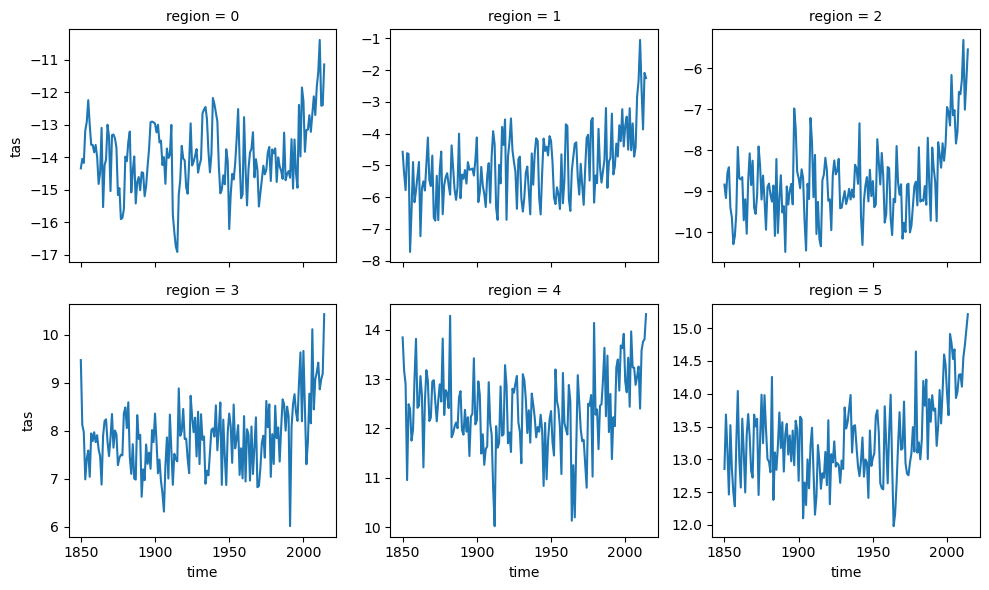

In [23]:
tas_regional.isel(region=slice(6)).plot(col="region", col_wrap=3, sharey=False);

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/phanaur/mambaforge/envs/tfg/lib/pytho

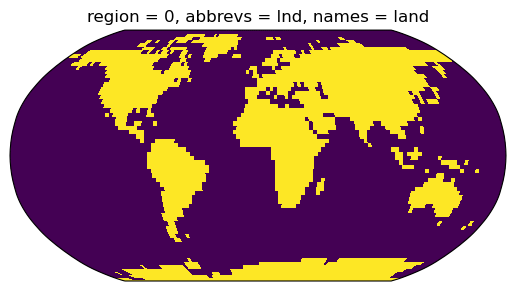

In [24]:
land_110 = regionmask.defined_regions.natural_earth.land_110

land_mask = land_110.mask_3D(tas)

# add a plot
ax = plt.axes(projection=ccrs.Robinson())
land_mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False);

In [25]:
mask_lsm = mask_3D * land_mask.squeeze(drop=True)

/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/utils.py:15: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polys += list(p)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/utils.py:15: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  polys += list(p)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/regionmask/core/plot.py:28: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  coords = _polygons_coords(polygons)
/home/phanaur/mambaforge/envs/tfg/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDep

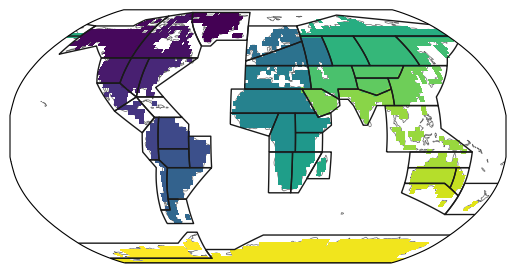

In [26]:
ar6_land.plot(add_label=False, line_kws=dict(lw=1), proj=ccrs.Robinson())

regionmask.plot_3D_mask(mask_lsm, transform=ccrs.PlateCarree(), add_colorbar=False);

In [27]:
tas_regional_land = tas.weighted(mask_lsm * weights).mean(dim=("lat", "lon"))

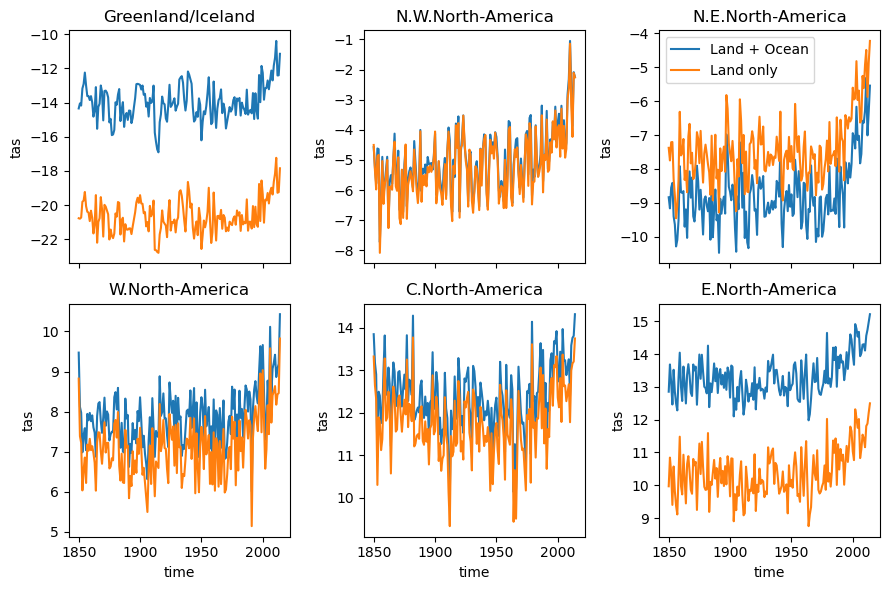

In [28]:
f, axes = plt.subplots(2, 3, sharex=True, figsize=(9, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):

    ds = tas_regional.isel(region=i)
    ds.plot(ax=ax, label="Land + Ocean")

    ds = tas_regional_land.isel(region=i)
    ds.plot(ax=ax, label="Land only")

    ax.set_title(ds.names.values)
    if i < 3:
        ax.set_xlabel("")

axes[2].legend()
plt.tight_layout()

In [29]:
def weighted_mean(da, weights, dim):
    """Reduce da by a weighted mean along some dimension(s).

    Parameters
    ----------
    da : DataArray
        Object over which the weighted reduction operation is applied.    
    weights : DataArray
        An array of weights associated with the values in this Dataset.
    dim : str or sequence of str, optional
        Dimension(s) over which to apply the weighted `mean`.
        
    Returns
    -------
    weighted_mean : DataArray
        New DataArray with weighted mean applied to its data and
        the indicated dimension(s) removed.
    """

    weighted_sum = (da * weights).sum(dim=dim, skipna=True)
    # need to mask weights where data is not valid
    masked_weights = weights.where(da.notnull())
    sum_of_weights = masked_weights.sum(dim=dim, skipna=True)
    valid_weights = sum_of_weights != 0
    sum_of_weights = sum_of_weights.where(valid_weights)

    return weighted_sum / sum_of_weights